In [1]:
# import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# read csv file with pandas
df = pd.read_csv('C:\\Users\\Rudra\\Desktop\\Sales_analysis.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#delete blank columns from dataset
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [8]:
#check the null values in Datasets
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Remove null values from dataset
df.dropna(inplace=True)

In [10]:
# change DataType of the colunmn "amount" from float to int
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int32')

In [12]:
# Finding the count, mean, std, etc with describe() method
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
# use describe() for specific columns
df[['Age', 'Orders']].describe()

,Age,Orders
count,11239.000000,11239.000000
mean,35.410357,2.489634
std,12.753866,1.114967
min,12.000000,1.000000
25%,27.000000,2.000000
50%,33.000000,2.000000
75%,43.000000,3.000000
max,92.000000,4.000000


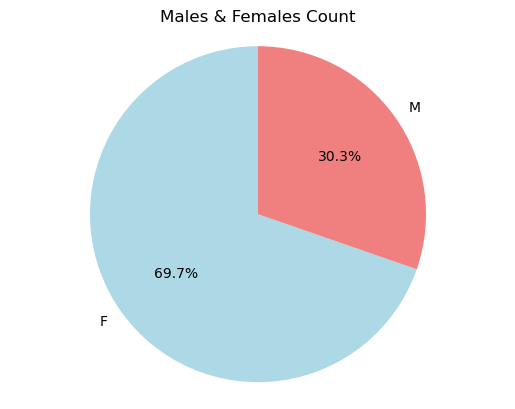

In [14]:
# plotting a Pie chart for Gender and it's count
Gender_Count=df['Gender'].value_counts()

plt.pie(Gender_Count, labels=Gender_Count.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Males & Females Count')
plt.axis('equal')
plt.show()

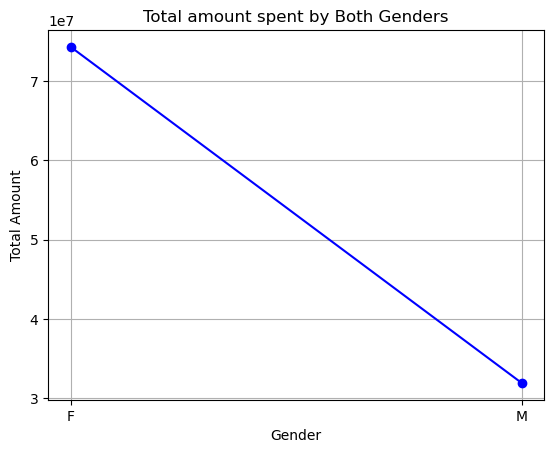

In [19]:
# plotting a Line chart for gender vs total amount

Gender_Spending= df.groupby('Gender')['Amount'].sum().reset_index()

plt.plot(Gender_Spending['Gender'], Gender_Spending['Amount'], marker='o', linestyle='-', color='b')
plt.title('Total amount spent by Both Genders')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.grid()
plt.show()

*After seeing this graphs it's states that that most of the Buyers are Females 

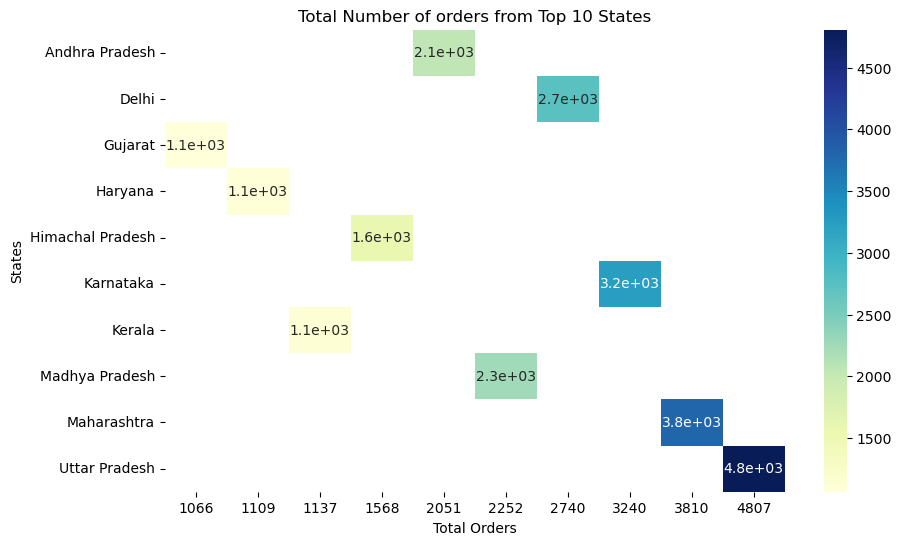

In [25]:
# plotting a Heat map for Total Numbers of Orders from top 10 States.
Ste_ord = df.groupby('State')['Orders'].sum().reset_index()

# Sort the required data by total orders and select the top ten states
Top_States = Ste_ord.sort_values(by='Orders', ascending=False).head(10)

# Create a pivot table for the heatmap
Hmap_Data = Top_States.pivot(index="State", columns="Orders", values="Orders")

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Hmap_Data, annot=True, cmap='YlGnBu', cbar=True)

# Set titles and labels
plt.title('Total Number of orders from Top 10 States')
plt.xlabel('Total Orders')
plt.ylabel('States')

# Show the plot
plt.show()

With this graph we can see that majority of the orders & total sales are from Uttar Pradesh, Maharashtra and Karnataka respectively


<Axes: xlabel='Product_Category', ylabel='Amount'>

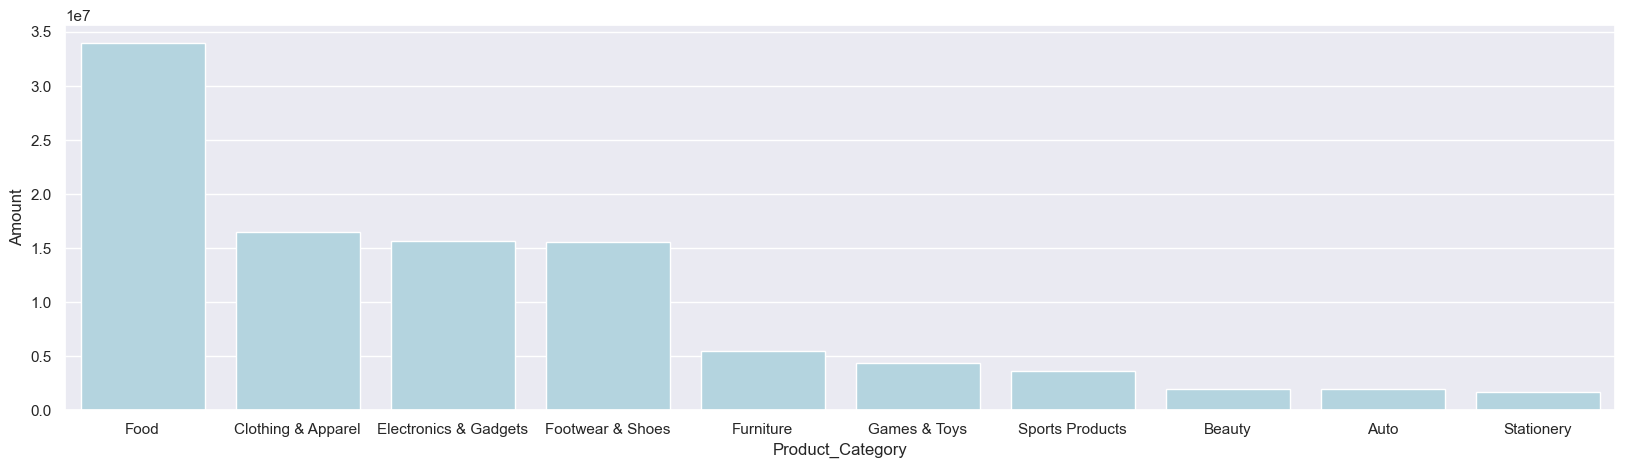

In [53]:
Sales = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.barplot(data = Sales, x = 'Product_Category',y= 'Amount',color='lightblue')

Foods are the most sold product and after that Clothing & Electronics category is high.